In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 解决坐标轴刻度负号乱码
plt.rcParams['axes.unicode_minus'] = False

# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['Simhei']

# 设置图片大小，单位为英寸
plt.rc('figure', figsize=(18, 6))

In [84]:
df = pd.read_csv('前程无忧_数据挖掘.csv',index_col=0)

In [85]:
df.salary = df.salary.fillna('1-1万/月')
df.iloc[204,3] = '300-300元/天'
df.iloc[296,3] = '200-200元/天'

In [86]:
df['low'] =df.salary.map(lambda x : x.split('-')[0])
df['high'] =df.salary.map(lambda x : x.split('-')[1][:-3])
df['unit'] =df.salary.map(lambda x : x.split('-')[1][-3])
df['timeunit'] =df.salary.map(lambda x : x[-1])


In [87]:
df.low = df.low.astype(float)
df.high = df.high.astype(float)

In [88]:
df['city'] = df.place.map(lambda x:x.split('-')[0])

In [89]:
low= df[(df.unit=='万') & (df.timeunit == '月')].loc[:,'low']*10
high= df[(df.unit=='万') & (df.timeunit == '月')].loc[:,'high']*10
ind = df[(df.unit=='万') & (df.timeunit == '月')].index.tolist()
df.iloc[ind, 5] = low
df.iloc[ind, 6] = high

low= df[(df.unit=='万') & (df.timeunit == '年')].loc[:,'low']*10/12
high= df[(df.unit=='万') & (df.timeunit == '年')].loc[:,'high']*10/12
ind = df[(df.unit=='万') & (df.timeunit == '年')].index.tolist()
df.iloc[ind, 5] = low
df.iloc[ind, 6] = high


low= df[df.unit=='元'].loc[:,'low']*30/1000
high= df[df.unit=='元'].loc[:,'high']*30/1000
ind = df[df.unit=='元'].index.tolist()
df.iloc[ind, 5] = low
df.iloc[ind, 6] = high

df['unit'] = '千'

In [90]:
df['mean'] = (df.low + df.high)/2

In [91]:
df[df.city=='北京']

,title,company,place,salary,publish_time,low,high,unit,timeunit,city,mean
0,数据挖掘工程师,字节跳动,北京,2-4万/月,03-31,20.000000,40.0,千,月,北京,30.000000
5,数据挖掘,北京三六九数动科技有限公司,北京-朝阳区,2-2.5万/月,03-31,20.000000,25.0,千,月,北京,22.500000
6,数据挖掘工程师,北京友聚四海网络科技有限公司,北京-朝阳区,2.5-3万/月,03-31,25.000000,30.0,千,月,北京,27.500000
9,数据挖掘开发工程师,亚信科技（中国）有限公司,北京-海淀区,1.2-2万/月,03-31,12.000000,20.0,千,月,北京,16.000000
30,数据挖掘工程师,北京安德信业信息咨询有限责任公司...,北京-朝阳区,2.5-4.5万/月,03-31,25.000000,45.0,千,月,北京,35.000000
34,垂类-B2B业务部_机器学习/数据挖掘工程师,百度在线网络技术（北京）有限公司...,北京,2-4万/月,03-31,20.000000,40.0,千,月,北京,30.000000
58,美团地图-资深数据挖掘工程师,美团点评,北京-朝阳区,2.5-3万/月,03-31,25.000000,30.0,千,月,北京,27.500000
110,大数据挖掘工程师,湖南金烽信息科技有限公司,北京,1.5-3万/月,03-31,15.000000,30.0,千,月,北京,22.500000
128,大数据工程师（数据挖掘）,北京万泰中联科技股份有限公司,北京-丰台区,0.8-2万/月,03-31,8.000000,20.0,千,月,北京,14.000000
138,数据挖掘专家,北京深演智能科技股份有限公司,北京,3-4万/月,03-31,30.000000,40.0,千,月,北京,35.000000


In [92]:
df.head()

,title,company,place,salary,publish_time,low,high,unit,timeunit,city,mean
0,数据挖掘工程师,字节跳动,北京,2-4万/月,03-31,20.0,40.0,千,月,北京,30.0
1,数据挖掘工程师,天作（济南）孵化器有限公司,济南-高新区,1.5-2万/月,03-31,15.0,20.0,千,月,济南,17.5
2,数据挖掘经理,上海瀛之杰汽车信息技术有限公司,上海-浦东新区,2.5-4万/月,03-31,25.0,40.0,千,月,上海,32.5
3,数据挖掘专家,东方福利网,上海,1.5-2万/月,03-31,15.0,20.0,千,月,上海,17.5
4,数据挖掘工程师,华海清科股份有限公司,天津-津南区,1-2万/月,03-31,10.0,20.0,千,月,天津,15.0


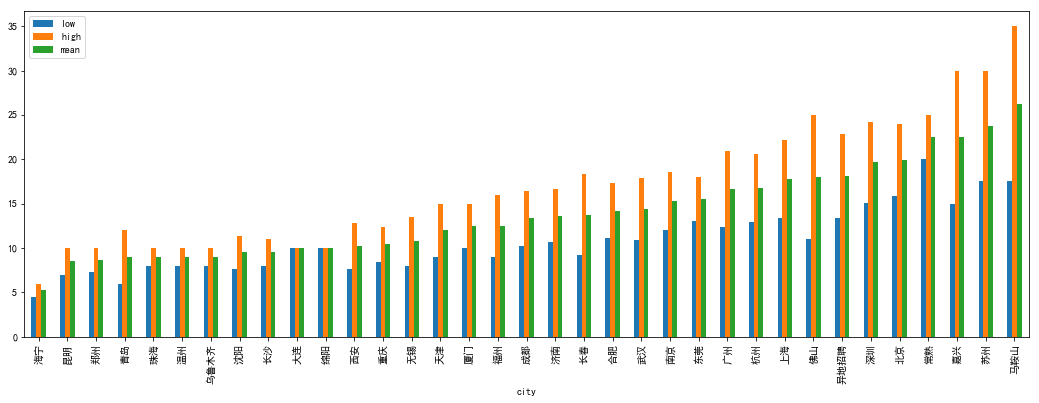

In [93]:
citystats = df.groupby('city').mean().sort_values(by='mean')
citystats.plot(kind='bar')

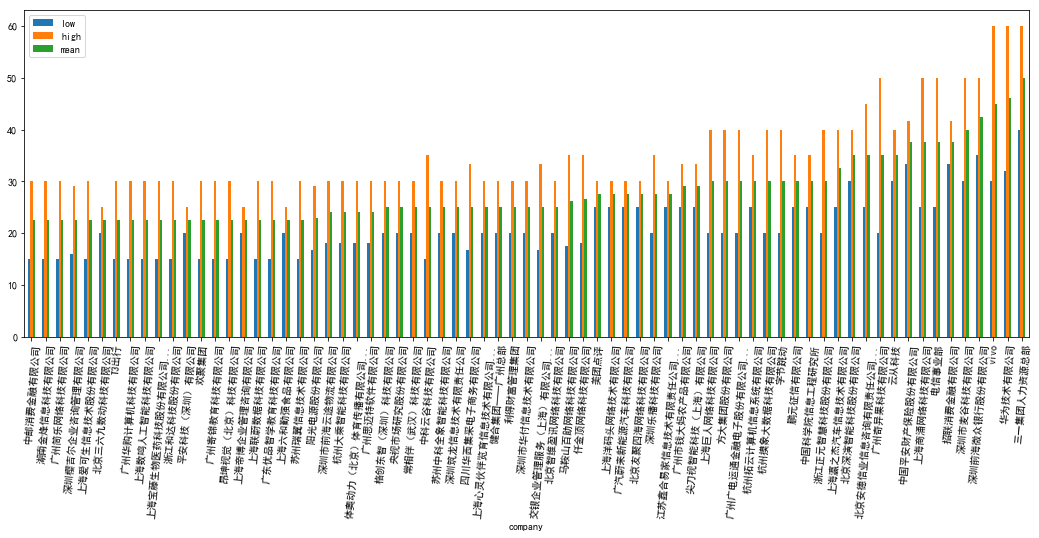

In [94]:
companystats = df.groupby('company').mean().sort_values(by='mean').iloc[220:,:]
companystats.plot(kind='bar',rot=85)

In [97]:
df.groupby('company').mean().sort_values(by='mean').iloc[250:,]

,low,high,mean
company,,,
深圳筑龙信息技术有限责任公司,20.000000,30.000000,25.000000
四川华西集采电子商务有限公司,16.666667,33.333333,25.000000
上海心灵伙伴览育信息技术有限公司...,20.000000,30.000000,25.000000
健合集团——广州总部,20.000000,30.000000,25.000000
利得财富管理集团,20.000000,30.000000,25.000000
深圳市华付信息技术有限公司,20.000000,30.000000,25.000000
交银企业管理服务（上海）有限公司...,16.666667,33.333333,25.000000
北京智维盈讯网络科技有限公司,20.000000,30.000000,25.000000
马鞍山百助网络科技有限公司,17.500000,35.000000,26.250000


In [96]:
df[df.city=='成都'].mean

,title,company,place,salary,publish_time,low,high,unit,timeunit,city,mean
7,大数据挖掘与分析（省本部）,中国电信四川公司,成都,1-1万/月,03-31,10.000000,10.000000,千,月,成都,10.00
13,数据挖掘工程师,亿达信息技术有限公司成都分公司,成都-高新区,7-9千/月,03-31,7.000000,9.000000,千,月,成都,8.00
26,AI工程师(数据挖掘）,四川天上友嘉网络科技有限公司,成都,1-2万/月,03-31,10.000000,20.000000,千,月,成都,15.00
56,风险建模师/数据挖掘,成都小启科技有限责任公司,成都-高新区,0.8-1.5万/月,03-31,8.000000,15.000000,千,月,成都,11.50
57,数据挖掘工程师,成都大汇智安科技有限公司,成都-武侯区,1.5-2.7万/月,03-31,15.000000,27.000000,千,月,成都,21.00
80,数据挖掘工程师,中国电信10000号,成都,0.6-1万/月,03-31,6.000000,10.000000,千,月,成都,8.00
92,Java数据挖掘分析应用研发工程师,电信科学技术第五研究所有限公司,成都,0.8-1.2万/月,03-31,8.000000,12.000000,千,月,成都,10.00
100,医药数据挖掘与分析师,成都健数科技有限公司,成都-高新区,0.8-1.2万/月,03-31,8.000000,12.000000,千,月,成都,10.00
109,数据挖掘工程师,西安舟济网络科技有限公司,成都-高新区,0.8-1万/月,03-31,8.000000,10.000000,千,月,成都,9.00
135,数据挖掘工程师,四川杰通交通科技有限公司,成都-高新区,1.5-2万/月,03-31,15.000000,20.000000,千,月,成都,17.50


In [99]:
df.groupby('city').mean().sort_values(by='mean').iloc[:,]

,low,high,mean
city,,,
海宁,4.500000,6.000000,5.250000
昆明,7.000000,10.000000,8.500000
郑州,7.333333,10.000000,8.666667
青岛,6.000000,12.000000,9.000000
珠海,8.000000,10.000000,9.000000
温州,8.000000,10.000000,9.000000
乌鲁木齐,8.000000,10.000000,9.000000
沈阳,7.666667,11.333333,9.500000
长沙,8.000000,11.000000,9.500000
